# Lab 5 - Emsembles
The model that will be analyzed this time is Random Forests and Gradient Boosting.

## Random Forests

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from utils import modelAnalyzesFunctions as analyzes

In [4]:
data_7: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation_7.csv', sep=',', decimal='.', index_col='id')
y_7: np.ndarray = data_7.pop('class').values
X_7: np.ndarray = data_7.values
labels_7 = pd.unique(y_7)

data_8: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation.csv', sep=',', decimal='.', index_col='id')
y_8: np.ndarray = data_8.pop('class').values
X_8: np.ndarray = data_8.values
labels_8 = pd.unique(y_8)

data_9: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation_9.csv', sep=',', decimal='.', index_col='id')
y_9: np.ndarray = data_9.pop('class').values
X_9: np.ndarray = data_9.values
labels_9 = pd.unique(y_9)

data_8.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.916232,0.475707,0.590235,0.284974,0.022323,0.075900,0.271284,0.944323,0.692855,...,0.075621,0.300582,0.105270,0.013066,0.004055,0.003293,0.000374,0.000178,0.000191,0.098628
1,0.0,0.182314,0.806469,0.630075,0.242228,0.689703,0.247423,0.228818,0.876238,0.882924,...,0.072430,0.077755,0.174381,0.038398,0.008310,0.001114,0.001689,0.024783,0.018258,0.040204
2,1.0,0.877689,0.216841,0.516437,0.448187,0.033848,0.087255,0.117413,0.974092,0.871010,...,0.147429,0.038159,0.013139,0.007834,0.019385,0.000201,0.000368,0.000336,0.213153,0.120303
3,0.0,0.925807,0.237611,0.542708,0.785622,0.010547,0.021814,0.161006,0.983185,0.781731,...,0.016141,0.161223,0.097629,0.037870,0.020783,0.009404,0.018881,0.003916,0.000815,0.009216
4,0.0,0.930451,0.757013,0.842307,0.532383,0.754983,0.148962,0.722861,0.734980,0.497109,...,0.142211,0.230036,0.117364,0.022389,0.009184,0.006695,0.009538,0.010617,0.013877,0.010267


In [5]:
n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

In [6]:
accuracy, sensitivity = analyzes.random_forest(X_8, y_8, rskf)

print("Baseline accuracy: ", accuracy)
print("Baseline sensitivity: ", sensitivity)

Baseline accuracy:  0.8519503546099291
Baseline sensitivity:  0.8014184397163121


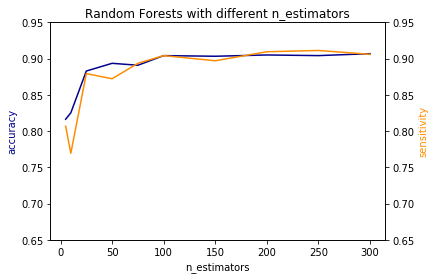

Max accuracy
Accuracy: 0.9069148936170213
Sensitivity: 0.9060283687943262
n_estimators: 300

Max sensitivity
Accuracy:  0.9042553191489362
Sensitivity: 0.9113475177304965
n_estimators: 250


In [7]:
accuracy, sensitivity = analyzes.random_forest_analyzes(X_8, y_8, n_estimators, "n_estimators", rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_n_estimators = max(accuracy, key=accuracy.get)
print('n_estimators:', best_n_estimators)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('n_estimators:', max(sensitivity, key=sensitivity.get))

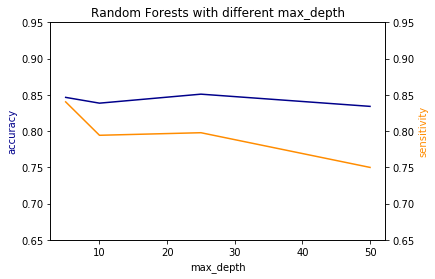

Max accuracy
Accuracy: 0.8510638297872339
Sensitivity: 0.797872340425532
max_depth: 25

Max sensitivity
Accuracy:  0.8466312056737589
Sensitivity: 0.8404255319148933
max_depth: 5


In [8]:
accuracy, sensitivity = analyzes.random_forest_analyzes(X_8, y_8, max_depths, "max_depth", rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_max_depth = max(accuracy, key=accuracy.get)
print('max_depth:', best_max_depth)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('max_depth:', max(sensitivity, key=sensitivity.get))

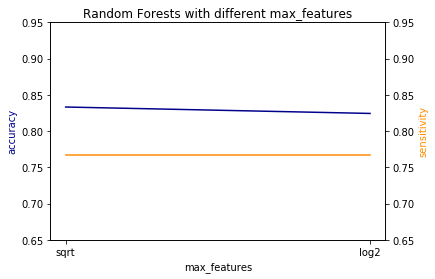

Max accuracy
Accuracy: 0.8333333333333334
Sensitivity: 0.7677304964539006
max_features: sqrt

Max sensitivity
Accuracy:  0.8333333333333334
Sensitivity: 0.7677304964539006
max_features: sqrt


In [9]:
accuracy, sensitivity = analyzes.random_forest_analyzes(X_8, y_8, max_features, "max_features", rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_max_features = max(accuracy, key=accuracy.get)
print('max_features:', best_max_features)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('max_features:', max(sensitivity, key=sensitivity.get))

In [10]:
accuracy, sensitivity = analyzes.random_forest(X_7, y_7, rskf, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.9015957446808511
Best sensitivity:  0.9042553191489362


In [11]:
accuracy, sensitivity = analyzes.random_forest(X_8, y_8, rskf, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.9104609929078014
Best sensitivity:  0.9184397163120569


In [12]:
accuracy, sensitivity = analyzes.random_forest(X_9, y_9, rskf, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.9131205673758865
Best sensitivity:  0.9042553191489362


## Gradient Boosting
Another model from the emsemble family is the Gradient Boosting. The main difference between it and the random forest is that the former is a boosting algorithm, which means that there are different weights for different models to try to classify better the dataset.

In [13]:
# already imported
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import RepeatedStratifiedKFold
# import sklearn.metrics as metrics
# import itertools
# import modelAnalyzesFunctions as analyzes

In [14]:
data_7: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation_7.csv', sep=',', decimal='.', index_col='id')
y_7: np.ndarray = data_7.pop('class').values
X_7: np.ndarray = data_7.values
labels_7 = pd.unique(y_7)

data_8: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation.csv', sep=',', decimal='.', index_col='id')
y_8: np.ndarray = data_8.pop('class').values
X_8: np.ndarray = data_8.values
labels_8 = pd.unique(y_8)

data_9: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation_9.csv', sep=',', decimal='.', index_col='id')
y_9: np.ndarray = data_9.pop('class').values
X_9: np.ndarray = data_9.values
labels_9 = pd.unique(y_9)

data_8.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.916232,0.475707,0.590235,0.284974,0.022323,0.075900,0.271284,0.944323,0.692855,...,0.075621,0.300582,0.105270,0.013066,0.004055,0.003293,0.000374,0.000178,0.000191,0.098628
1,0.0,0.182314,0.806469,0.630075,0.242228,0.689703,0.247423,0.228818,0.876238,0.882924,...,0.072430,0.077755,0.174381,0.038398,0.008310,0.001114,0.001689,0.024783,0.018258,0.040204
2,1.0,0.877689,0.216841,0.516437,0.448187,0.033848,0.087255,0.117413,0.974092,0.871010,...,0.147429,0.038159,0.013139,0.007834,0.019385,0.000201,0.000368,0.000336,0.213153,0.120303
3,0.0,0.925807,0.237611,0.542708,0.785622,0.010547,0.021814,0.161006,0.983185,0.781731,...,0.016141,0.161223,0.097629,0.037870,0.020783,0.009404,0.018881,0.003916,0.000815,0.009216
4,0.0,0.930451,0.757013,0.842307,0.532383,0.754983,0.148962,0.722861,0.734980,0.497109,...,0.142211,0.230036,0.117364,0.022389,0.009184,0.006695,0.009538,0.010617,0.013877,0.010267


In [15]:
n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

To have a better understanding of the influencers of each parameter, we will check the accuracy and the sensitivity for the default parameters and then make some changes to see the difference of the metrics for each variation.

In [16]:
accuracy, recall = analyzes.gradient_boosting(X_8, y_8, rskf)
print('Accuracy:', accuracy)
print('Sensitivity:', recall)

Accuracy: 0.8918439716312055
Sensitivity: 0.8812056737588652


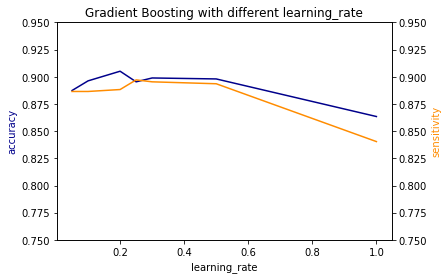

Max accuracy
Accuracy: 0.9051418439716313
Sensitivity: 0.8882978723404257
learning_rate: 0.2

Max sensitivity
Accuracy:  0.895390070921986
Sensitivity: 0.8971631205673759
learning_rate: 0.25


In [17]:
learning_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.5, 1]
n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [3, 5, 10, 25, 50]
max_features = ['sqrt', 'log2']

accuracy, sensitivity = analyzes.gradient_boosting_analyzes(X_8, y_8, learning_rate, 'learning_rate', rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_learning_rate = max(accuracy, key=accuracy.get)
print('learning_rate:', max(accuracy, key=accuracy.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('learning_rate:', max(sensitivity, key=sensitivity.get))

Higher learning rates make the adjustments to the prediction too sensitivy, probably, resulting in more abrupt changes, causing the loss in the accuracy and in the sensitivity.

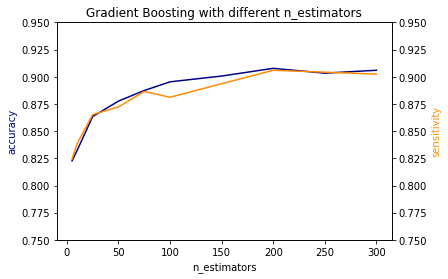

Max accuracy
Accuracy: 0.9078014184397163
Sensitivity: 0.9060283687943264
n_estimators: 200

Max sensitivity
Accuracy:  0.9078014184397163
Sensitivity: 0.9060283687943264
n_estimators: 200


In [18]:
accuracy, sensitivity = analyzes.gradient_boosting_analyzes(X_8, y_8, n_estimators, 'n_estimators', rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_n_estimators = max(accuracy, key=accuracy.get)
print('n_estimators:', max(accuracy, key=accuracy.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('n_estimators:', max(sensitivity, key=sensitivity.get))

Gradient boosting is fairly robust to over-fitting, so, usually, the larger number, the better.

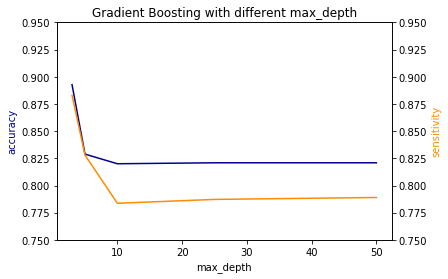

Max accuracy
Accuracy: 0.8927304964539008
Sensitivity: 0.8829787234042553
max_depth: 3

Max sensitivity
Accuracy:  0.8927304964539008
Sensitivity: 0.8829787234042553
max_depth: 3


In [19]:
accuracy, sensitivity = analyzes.gradient_boosting_analyzes(X_8, y_8, max_depths, 'max_depth', rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_max_depth = max(accuracy, key=accuracy.get)
print('max_depth:', max(accuracy, key=accuracy.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('max_depth:', max(sensitivity, key=sensitivity.get))

The increase of max_depth may result in lower accuracy because of the low number of records in the dataset.

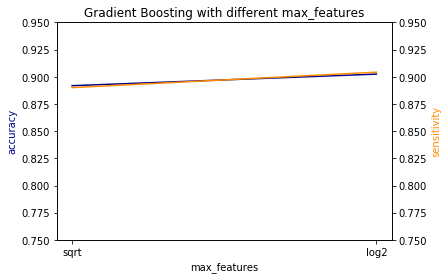

Max accuracy
Accuracy: 0.902482269503546
Sensitivity: 0.9042553191489363
max_features: log2

Max sensitivity
Accuracy:  0.902482269503546
Sensitivity: 0.9042553191489363
max_features: log2


In [20]:
accuracy, sensitivity = analyzes.gradient_boosting_analyzes(X_8, y_8, max_features, 'max_features', rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_max_features = max(accuracy, key=accuracy.get)
print('max_features:', max(accuracy, key=accuracy.get))
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('max_features:', max(sensitivity, key=sensitivity.get))

Between the two max_features criterions, the difference is really low.

In [21]:
accuracy, sensitivity = analyzes.gradient_boosting(X_7, y_7, rskf, learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.901595744680851
Best sensitivity:  0.9042553191489361


In [22]:
accuracy, sensitivity = analyzes.gradient_boosting(X_8, y_8, rskf, learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.9104609929078015
Best sensitivity:  0.902482269503546


In [23]:
accuracy, sensitivity = analyzes.gradient_boosting(X_9, y_9, rskf, learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)
print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.921985815602837
Best sensitivity:  0.9131205673758868
